In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import RegexpTokenizer


In [61]:
df = pd.read_csv("SC_Vuln_8label.csv")
print(df.head())
print(df.isnull().sum()) #no missing values

   Unnamed: 0   filename                                               code  \
0           0  33790.sol  pragma solidity ^0.4.4;\n\ncontract Token {\n\...   
1           1  31454.sol  pragma solidity ^0.4.4;\n\ncontract Token {\n\...   
2           2  40744.sol  contract SendBalance {\n mapping (address => u...   
3           3  39290.sol  /**\n * Originally from https://github.com/Con...   
4           4  39358.sol  pragma solidity ^0.4.4;\n\nlibrary ArrayLib{\n...   

                        label  label_encoded  
0  ./Dataset/reentrancy (RE)/              5  
1  ./Dataset/reentrancy (RE)/              5  
2  ./Dataset/reentrancy (RE)/              5  
3  ./Dataset/reentrancy (RE)/              5  
4  ./Dataset/reentrancy (RE)/              5  
Unnamed: 0       0
filename         0
code             0
label            0
label_encoded    0
dtype: int64


In [62]:
value_counts = df['label_encoded'].value_counts()
print(value_counts)

label_encoded
5    1218
7    1199
4     590
0     406
3     366
6     312
1      97
2      97
Name: count, dtype: int64


/var/folders/ln/h53dq6lx7ms860khpwqxq2vc0000gn/T/ipykernel_80960/2663077865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['label_encoded'], palette = 'Set1', alpha = 0.8)


Text(0.5, 1.0, 'Distribution of vulnerabilities')

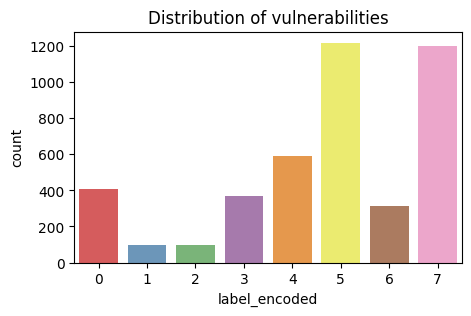

In [22]:
plt.figure(figsize = (5,3))
sns.countplot(x = df['label_encoded'], palette = 'Set1', alpha = 0.8)
plt.title('Distribution of vulnerabilities')

In [59]:
import re

def clean_code(code):
    # Remove comments (single-line and multi-line)
    code = re.sub(r'\/\/.*', '', code)
    code = re.sub(r'\/\*[\s\S]*?\*\/', '', code)
    code = re.sub(r"pragma solidity[^;]+;", "", code)
    code = re.sub(r"import [^;]+;", "", code)
    code = re.sub(r"\s+", " ", code).strip()

    string_literals = re.findall(r'"[^"]*"|\'[^\']*\'', code)
    string_map = {s: f'__STRING{idx}__' for idx, s in enumerate(string_literals)}
    for string, placeholder in string_map.items():
        code = code.replace(string, placeholder)
    
    return code


df['clean_code'] = df['code'].apply(clean_code)
print(df['clean_code'][0])


contract Token { function totalSupply(uint256) constant returns (uint256 supply) {} function balanceOf(address _owner) constant returns (uint256 balance) {} function transfer(address _to, uint256 _value) returns (bool success) {} function transferFrom(address _from, address _to, uint256 _value) returns (bool success) {} function approve(address _spender, uint256 _value) returns (bool success) {} function allowance(address _owner, address _spender) constant returns (uint256 remaining) {} event Transfer(address indexed _from, address indexed _to, uint256 _value); event Approval(address indexed _owner, address indexed _spender, uint256 _value); } contract StandardToken is Token { function transfer(address _to, uint256 _value) returns (bool success) { if (balances[msg.sender] >= _value && _value > 0) { balances[msg.sender] -= _value; balances[_to] += _value; Transfer(msg.sender, _to, _value); return true; } else { return false; } } function transferFrom(address _from, address _to, uint256 

In [ ]:
#Tokenization helps extract important elements from the code
solidity_token_pattern = r"""
    [A-Za-z_][A-Za-z_0-9]*      
    |\d+\.\d+|\d+               
    |0x[0-9a-fA-F]+             
    |\d+e[+-]?\d+              
    |==|!=|>=|<=|\+=|-=|\*=|/=  
    |=>|=<|>>|<<|\+\+|--        
    |&&|\|\||!                  
    |[^\w\s]                    
"""

tokenizer = RegexpTokenizer(solidity_token_pattern, flags=re.VERBOSE)

df['tokens'] = df['clean_code'].apply(tokenizer.tokenize)
print(df['tokens'][0])

['contract', 'Token', '{', 'function', 'totalSupply', '(', 'uint256', ')', 'constant', 'returns', '(', 'uint256', 'supply', ')', '{', '}', 'function', 'balanceOf', '(', 'address', '_owner', ')', 'constant', 'returns', '(', 'uint256', 'balance', ')', '{', '}', 'function', 'transfer', '(', 'address', '_to', ',', 'uint256', '_value', ')', 'returns', '(', 'bool', 'success', ')', '{', '}', 'function', 'transferFrom', '(', 'address', '_from', ',', 'address', '_to', ',', 'uint256', '_value', ')', 'returns', '(', 'bool', 'success', ')', '{', '}', 'function', 'approve', '(', 'address', '_spender', ',', 'uint256', '_value', ')', 'returns', '(', 'bool', 'success', ')', '{', '}', 'function', 'allowance', '(', 'address', '_owner', ',', 'address', '_spender', ')', 'constant', 'returns', '(', 'uint256', 'remaining', ')', '{', '}', 'event', 'Transfer', '(', 'address', 'indexed', '_from', ',', 'address', 'indexed', '_to', ',', 'uint256', '_value', ')', ';', 'event', 'Approval', '(', 'address', 'indexed